# Tests for Portfolio VaR Functions

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf

# Import functions
import portfolio_var as pv
import plots as pl
import expected_shortfall as ES
import data_download as dd

### Asset Normal/ Undiversified VaR

**NOTE**: since we already have the parametric VaR, a Portfolio-Normal VaR function is redundant. Portfolio-Normal is exactly like parametric VaR (which we have), and that can be backtested and ES can be done (add note about that).

In [34]:
# Set parameters
confidence_level = 0.99
holding_period = 1

In [ ]:
# Step 1: Define tickers and shares
tickers = [
    "AAPL", "MSFT", "NVDA", "GOOGL", "JPM",
    "UNH", "KO", "PEP", "BMW.DE", "NESN.SW",
    "NOVN.SW", "ASML.AS"
]

# Assign number of shares per asset
shares = pd.Series(10, index=tickers)

# Step 2: Download adjusted prices
prices = dd.get_raw_prices(tickers, start="2022-01-01")

# Step 3: Compute monetary positions
position_data = prices * shares

# Step 4: Convert positions to CHF
position_data = dd.convert_to_base(position_data, base="CHF")

# Step 5: Compute returns and summary stats
returns, mean_returns, covariance_matrix = dd.compute_returns_stats(position_data)

# Step 6: Display results
print(f"\nPortfolio final value in CHF: {position_data.sum(axis=1).iloc[-1]:.2f}")
print("\nSample of daily returns:\n", returns.head())
print("\nMean returns (daily, in CHF):\n", mean_returns)
print("\nCovariance matrix (in CHF):\n", covariance_matrix)


[currency detection] AAPL: USD
[currency detection] ASML.AS: EUR
[currency detection] BMW.DE: EUR
[currency detection] GOOGL: USD
[currency detection] JPM: USD
[currency detection] KO: USD
[currency detection] MSFT: USD
[currency detection] NESN.SW: CHF
[currency detection] NOVN.SW: CHF
[currency detection] NVDA: USD
[currency detection] PEP: USD
[currency detection] UNH: USD
[fx download] Downloading FX pairs: CHFEUR=X, CHFUSD=X
[conversion] AAPL: USD → CHF via CHFUSD=X
[conversion] ASML.AS: EUR → CHF via CHFEUR=X
[conversion] BMW.DE: EUR → CHF via CHFEUR=X
[conversion] GOOGL: USD → CHF via CHFUSD=X
[conversion] JPM: USD → CHF via CHFUSD=X
[conversion] KO: USD → CHF via CHFUSD=X
[conversion] MSFT: USD → CHF via CHFUSD=X
[conversion] NVDA: USD → CHF via CHFUSD=X
[conversion] PEP: USD → CHF via CHFUSD=X
[conversion] UNH: USD → CHF via CHFUSD=X

Portfolio final value in CHF: 22879.48

Sample of daily returns:
                 AAPL   ASML.AS    BMW.DE     GOOGL       JPM        KO  \
Date

In [38]:
position_data.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-03,1631.340131,7025.575986,764.282022,1315.994598,1340.565016,490.486074,2969.707729,1150.985565,649.150009,274.214658,1434.524215,4368.311100
2022-01-04,1621.859208,6825.476190,788.695004,1319.754460,1401.081375,502.149566,2939.124749,1153.479462,650.281296,268.507619,1446.608607,4299.089778
2022-01-05,1575.073275,6694.489771,802.647868,1256.302070,1372.291213,505.145201,2819.773550,1122.304459,655.372391,252.467452,1448.184426,4278.593315
2022-01-06,1550.774940,6596.167861,805.584408,1257.668994,1388.656601,503.133264,2801.095688,1119.810410,659.412918,258.049244,1450.383473,4108.781028
2022-01-07,1559.092840,6679.590928,802.714667,1256.467577,1408.545675,504.162497,2814.772948,1108.587341,660.463486,250.613952,1458.566239,4029.647053


In [39]:
# Compute and display the summary
summary_df = pv.var_asset_normal(position_data)

In [40]:
summary_df.head()

,Diversified_VaR,Undiversified_VaR,Diversification_Benefit
Date,,,
2022-01-04,676.611512,1059.555559,382.944046
2022-01-05,661.733623,1038.287615,376.553993
2022-01-06,653.124636,1024.695349,371.570713
2022-01-07,656.062074,1027.042979,370.980905
2022-01-10,638.040858,1005.328163,367.287305


### Marginal VaR

In [41]:
# Compute and display Marginal VaR (styled table)
marginal_df = pv.marginal_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [42]:
marginal_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.029816,0.046428,0.017899,0.031755,0.021841,0.011145,0.030644,0.006164,0.005647,0.052084,0.010974,0.020568
2022-01-05,0.029703,0.046422,0.017982,0.031561,0.021835,0.011198,0.030479,0.006204,0.005716,0.051790,0.011033,0.020747
2022-01-06,0.029771,0.046481,0.018049,0.031662,0.021904,0.011194,0.030557,0.006216,0.005714,0.051959,0.011030,0.020498
2022-01-07,0.029738,0.046696,0.018096,0.031632,0.021876,0.011132,0.030533,0.006201,0.005696,0.051984,0.010958,0.020224
2022-01-10,0.030083,0.045881,0.017993,0.031962,0.022163,0.011397,0.030831,0.006219,0.005735,0.052065,0.011267,0.020845


### Incremental, Component and Relative Component VaR

In [43]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [44]:
component_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,48.356866,316.896182,14.117181,41.908799,30.600845,5.596263,90.067693,7.110120,3.672404,13.985001,15.875327,88.424832
2022-01-05,46.785075,310.769482,14.433395,39.650357,29.964305,5.656676,85.943268,6.962681,3.745927,13.075343,15.977959,88.769154
2022-01-06,46.167893,306.597895,14.539606,39.819884,30.416704,5.632263,85.593034,6.960404,3.767610,13.408098,15.997937,84.223307
2022-01-07,46.364528,311.912880,14.525961,39.744595,30.813312,5.612553,85.942953,6.874815,3.761902,13.027828,15.983370,81.497376
2022-01-10,46.777428,287.521435,14.720344,40.530685,31.160905,5.739612,86.604466,6.751960,3.818673,13.085108,16.396290,84.933952


In [45]:
rcvar_df = pv.relative_component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [46]:
rcvar_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.071469,0.468358,0.020865,0.061939,0.045227,0.008271,0.133116,0.010508,0.005428,0.020669,0.023463,0.130688
2022-01-05,0.070701,0.469629,0.021811,0.059919,0.045282,0.008548,0.129876,0.010522,0.005661,0.019759,0.024146,0.134146
2022-01-06,0.070688,0.469432,0.022262,0.060968,0.046571,0.008624,0.131052,0.010657,0.005769,0.020529,0.024494,0.128954
2022-01-07,0.070671,0.475432,0.022141,0.060581,0.046967,0.008555,0.130998,0.010479,0.005734,0.019858,0.024363,0.124222
2022-01-10,0.073314,0.450632,0.023071,0.063524,0.048838,0.008996,0.135735,0.010582,0.005985,0.020508,0.025698,0.133117


In [47]:
# Define change in position
change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ivar_series = pv.incremental_var(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [48]:
ivar_series.head()

Date
2022-01-04    464.284356
2022-01-05    464.216830
2022-01-06    464.812148
2022-01-07    466.964046
2022-01-10    458.809309
dtype: float64

### ES Test

In [49]:
# Compute and display Marginal VaR (styled table)
marginal_es_df = ES.marginal_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [50]:
marginal_es_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.034159,0.053191,0.020507,0.036381,0.025022,0.012768,0.035108,0.007062,0.006470,0.059671,0.012573,0.023564
2022-01-05,0.034030,0.053184,0.020602,0.036159,0.025016,0.012829,0.034918,0.007108,0.006548,0.059334,0.012640,0.023769
2022-01-06,0.034107,0.053252,0.020678,0.036274,0.025094,0.012825,0.035008,0.007121,0.006546,0.059528,0.012637,0.023484
2022-01-07,0.034070,0.053498,0.020732,0.036240,0.025063,0.012754,0.034980,0.007105,0.006526,0.059556,0.012555,0.023170
2022-01-10,0.034465,0.052564,0.020614,0.036618,0.025392,0.013057,0.035322,0.007124,0.006571,0.059649,0.012908,0.023881


In [51]:
# Compute and display Component VaR (styled table)
component_es_df = ES.component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [52]:
component_es_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,55.400745,363.056712,16.173553,48.013425,35.058302,6.411439,103.187361,8.145812,4.207343,16.022119,18.187799,101.305193
2022-01-05,53.600000,356.037569,16.535828,45.426007,34.329041,6.480653,98.462153,7.976897,4.291576,14.979956,18.305381,101.699670
2022-01-06,52.892917,351.258330,16.657511,45.620229,34.847339,6.452684,98.060902,7.974288,4.316417,15.361182,18.328268,96.491654
2022-01-07,53.118195,357.347520,16.641879,45.533972,35.301719,6.430103,98.461792,7.876232,4.309877,14.925520,18.311580,93.368653
2022-01-10,53.591240,329.403107,16.864576,46.434568,35.699943,6.575670,99.219664,7.735481,4.374918,14.991144,18.784648,97.305815


In [53]:
res_df = ES.relative_component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [54]:
res_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.071469,0.468358,0.020865,0.061939,0.045227,0.008271,0.133116,0.010508,0.005428,0.020669,0.023463,0.130688
2022-01-05,0.070701,0.469629,0.021811,0.059919,0.045282,0.008548,0.129876,0.010522,0.005661,0.019759,0.024146,0.134146
2022-01-06,0.070688,0.469432,0.022262,0.060968,0.046571,0.008624,0.131052,0.010657,0.005769,0.020529,0.024494,0.128954
2022-01-07,0.070671,0.475432,0.022141,0.060581,0.046967,0.008555,0.130998,0.010479,0.005734,0.019858,0.024363,0.124222
2022-01-10,0.073314,0.450632,0.023071,0.063524,0.048838,0.008996,0.135735,0.010582,0.005985,0.020508,0.025698,0.133117


In [55]:
# Define change in position
change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ies_series = ES.incremental_es(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [56]:
ies_series.head()

Date
2022-01-04    531.914114
2022-01-05    531.836751
2022-01-06    532.518786
2022-01-07    534.984139
2022-01-10    525.641547
dtype: float64

### Visualizations


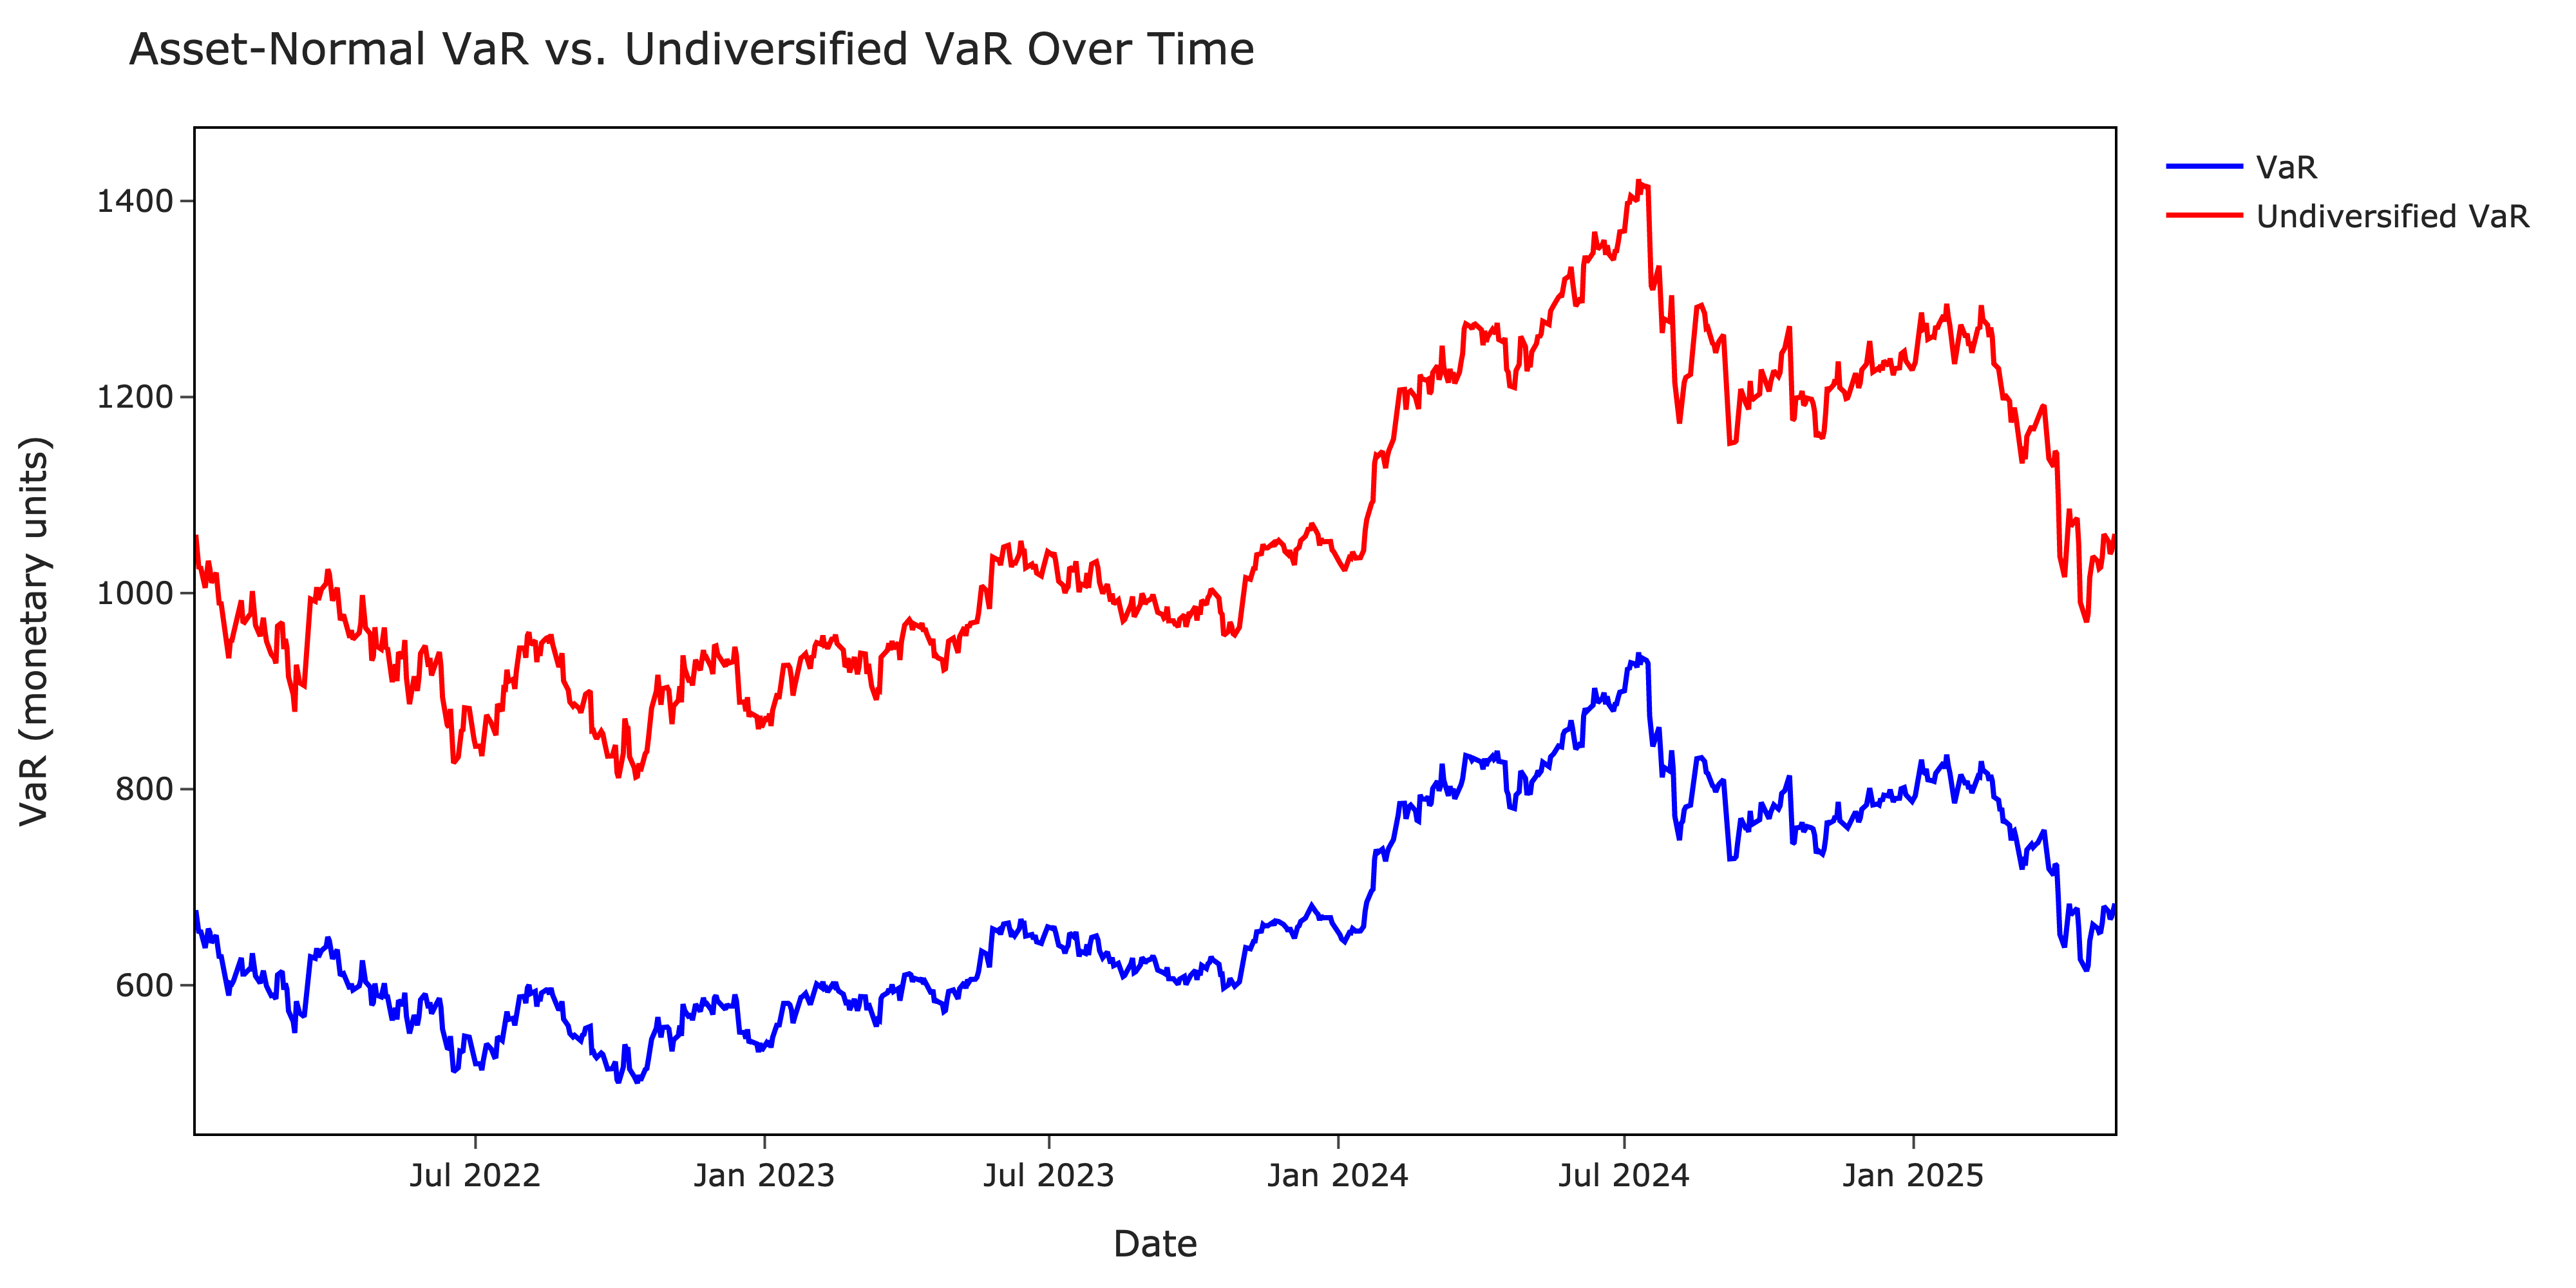

In [57]:
pl.plot_var_series(summary_df, interactive=False)


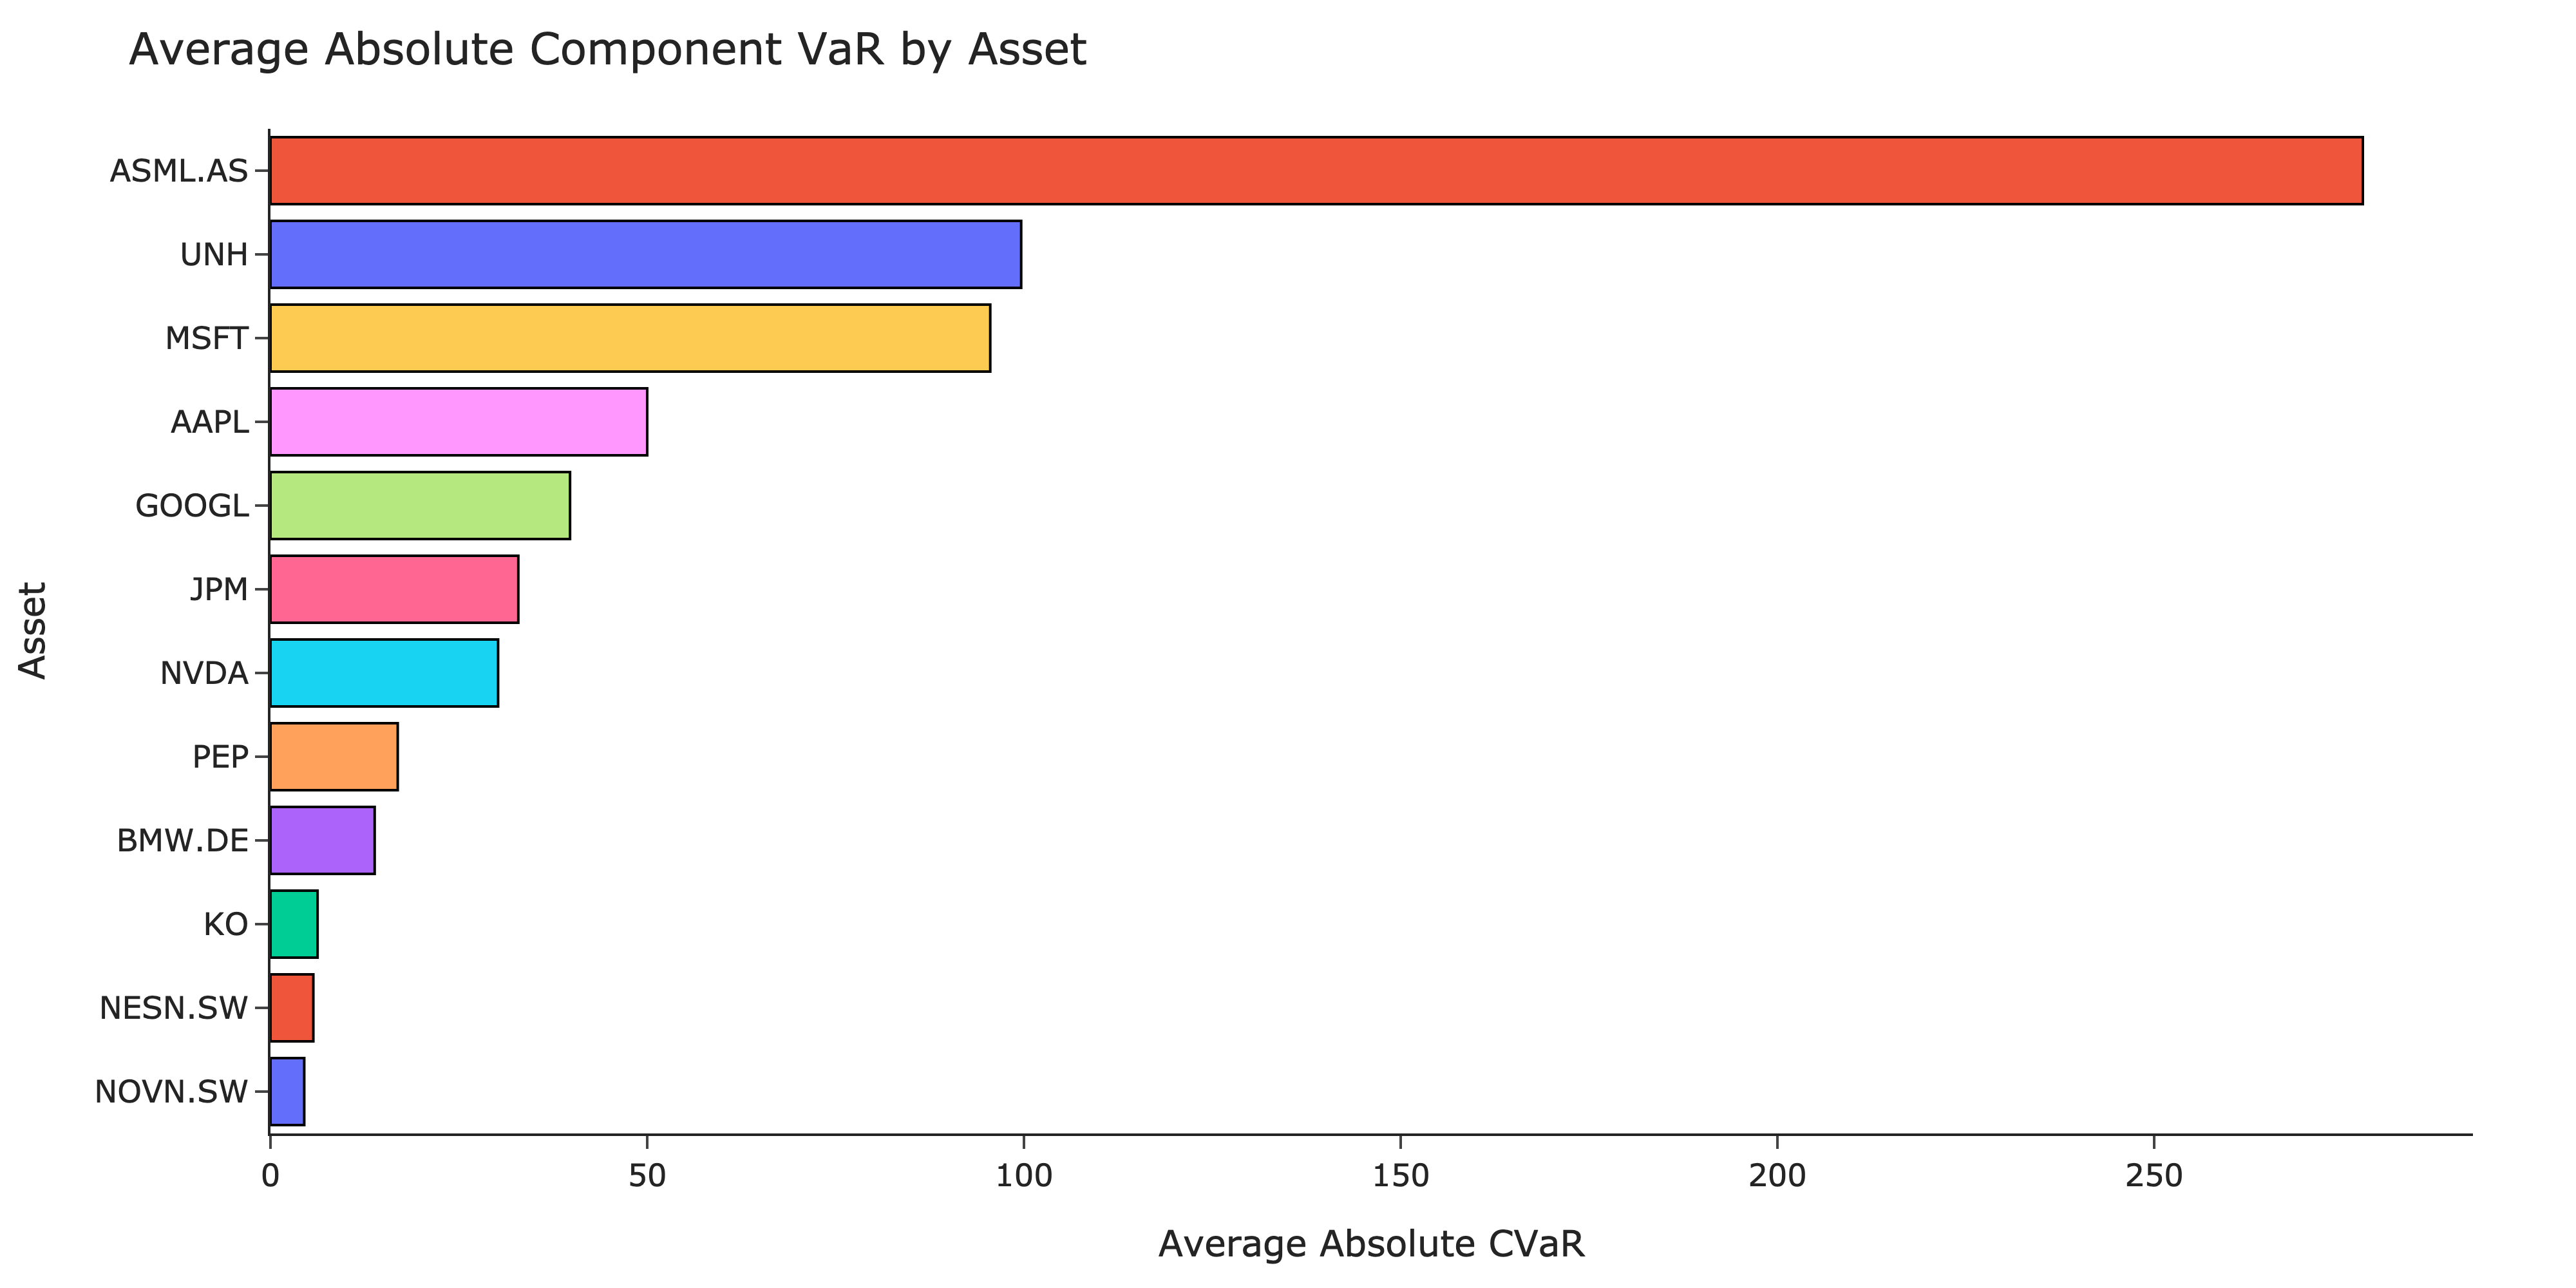

In [58]:
pl.plot_risk_contribution_bar(component_df, interactive=False)

In [ ]:
pl.plot_risk_contribution_lines(component_df, interactive=False)

In [ ]:
pl.plot_correlation_matrix(position_data, interactive=False)

---
### Appendix

- **Asset-Normal VaR (AN VaR)**  
  $$
  \text{VaR}_t = z_\alpha \cdot \sqrt{x_t^\top \Sigma x_t} \cdot \sqrt{h}
  $$

- **Undiversified VaR (UVaR)**  
  $$
  \text{UVaR}_t = z_\alpha \cdot \sum_{i=1}^N \sigma_i x_{i,t} \cdot \sqrt{h}
  $$

- **Marginal VaR**  
  $$
  \Delta \text{VaR}_{i,t} = \text{VaR}_t \cdot \frac{(\Sigma x_t)_i}{x_t^\top \Sigma x_t}
  $$

- **Component VaR**  
  $$
  \text{CVaR}_{i,t} = x_{i,t} \cdot \Delta \text{VaR}_{i,t}
  $$

- **Relative Component VaR**  
  $$
  \text{RCVaR}_{i,t} = \frac{\text{CVaR}_{i,t}}{\text{VaR}_t}
  $$

- **Incremental VaR**  
  $$
  \text{IVaR}_t = \Delta \text{VaR}_t^\top \cdot a
  $$

---

### Function Dependencies

```text
var_asset_normal()
 └── marginal_var()
      ├── component_var()
      │     └── relative_component_var()
      └── incremental_var()
```

---

### Notes
- All risk measures are in **monetary terms**.
- Covariance is based on returns inferred from time series of holdings.
- Inputs: matrix of monetary holdings, confidence level $z_\alpha$, and horizon $h$.